# Overview

    -Test/Train Split
    -Min Max Scaling 

# Load Libraries & Data

In [1]:
import glob, os
import pandas as pd
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image
from sklearn.model_selection import train_test_split
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

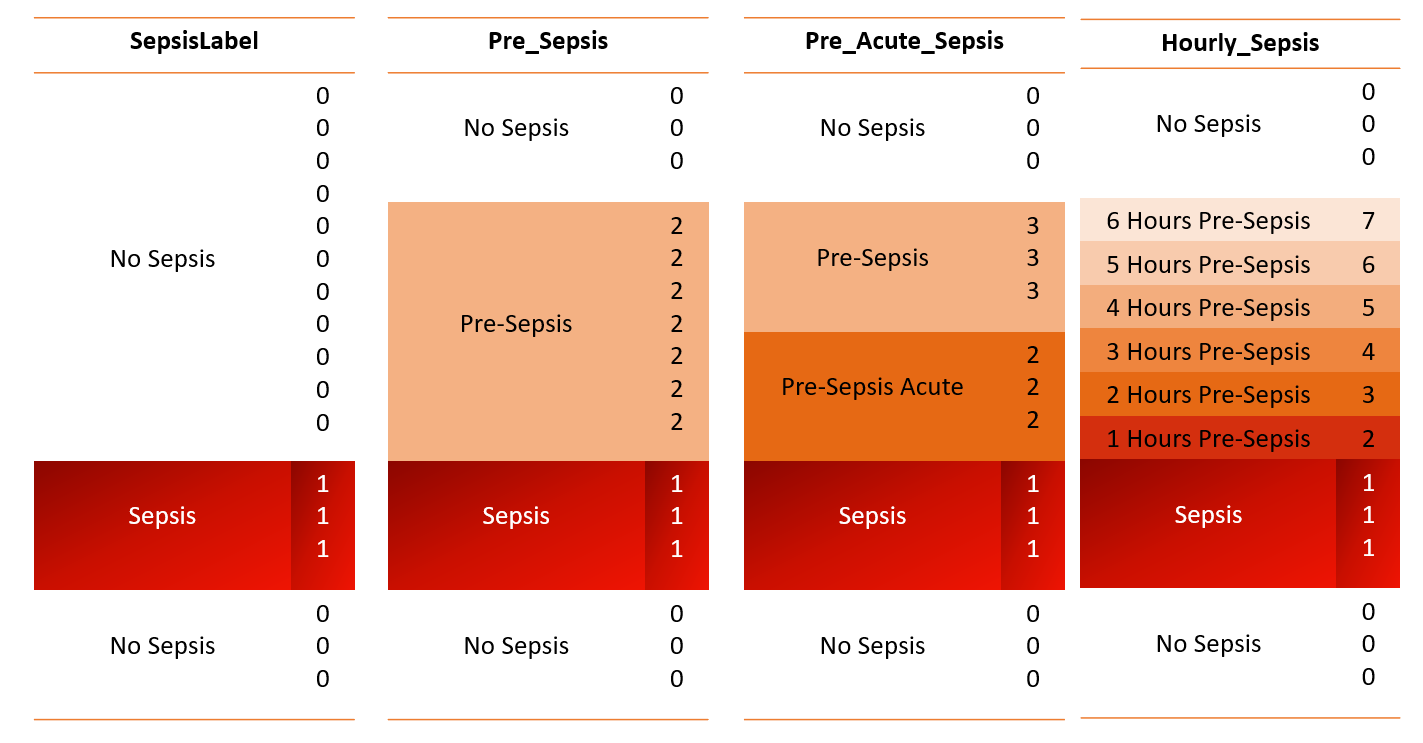

In [2]:
os.chdir("../data/interim")

#Load in Data
#First, the notes
with open("Data_Notes.json", "r") as infile:  
    notes=json.load(infile)
    
os.chdir("../processed")
#Next, the actual data
df=pd.read_csv('sepsis_data_preprocessed.csv',index_col=0)

os.chdir("../../docs")
Image(filename='SepsisClassifier.PNG') 

In [3]:
X=df.drop(columns=['SepsisLabel','SepsisOnset', 'Hourly_Sepsis', 'Pre_Sepsis', 'Pre_Acute_Sepsis'])
y_hr=df['Hourly_Sepsis']
y_pre_acute=df['Pre_Acute_Sepsis']
y_pre=df['Pre_Sepsis']
y_sepsis=df['SepsisLabel']
n=42

#Stratify argument???
X_train_hr, X_test_hr, y_train_hr, y_test_hr = train_test_split(X,y_hr,test_size=0.25,random_state=n)
X_train_pre_acute, X_test_pre_acute, y_train_pre_acute, y_test_pre_acute = train_test_split(X,y_pre_acute,test_size=0.25,random_state=n)
X_train_pre, X_test_pre, y_train_pre, y_test_pre = train_test_split(X,y_pre,test_size=0.25,random_state=n)
X_train_sepsis, X_test_sepsis, y_train_sepsis, y_test_sepsis = train_test_split(X,y_sepsis,test_size=0.25,random_state=n)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 231307 entries, 0 to 231306
Data columns (total 97 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   d3_HR                 231307 non-null  float64
 1   d3_O2Sat              231307 non-null  float64
 2   d3_Temp               231307 non-null  float64
 3   d3_SBP                231307 non-null  float64
 4   d3_MAP                231307 non-null  float64
 5   d3_DBP                231307 non-null  float64
 6   d3_Resp               231307 non-null  float64
 7   d3_EtCO2              231307 non-null  float64
 8   d2_HR                 231307 non-null  float64
 9   d2_O2Sat              231307 non-null  float64
 10  d2_Temp               231307 non-null  float64
 11  d2_SBP                231307 non-null  float64
 12  d2_MAP                231307 non-null  float64
 13  d2_DBP                231307 non-null  float64
 14  d2_Resp               231307 non-null  float64
 15  

In [5]:
X_train_hr.loc[:,'BaseExcess':'Dum_Platelets']

,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Bilirubin_direct,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,id,HospitalA,Dum_BaseExcess,Dum_HCO3,Dum_FiO2,Dum_pH,Dum_PaCO2,Dum_SaO2,Dum_AST,Dum_BUN,Dum_Alkalinephos,Dum_Calcium,Dum_Chloride,Dum_Creatinine,Dum_Bilirubin_direct,Dum_Glucose,Dum_Lactate,Dum_Magnesium,Dum_Phosphate,Dum_Potassium,Dum_Bilirubin_total,Dum_TroponinI,Dum_Hct,Dum_Hgb,Dum_PTT,Dum_WBC,Dum_Fibrinogen,Dum_Platelets
54696,-4.0,19.0,0.40,7.37,33.0,0.367202,0.455731,1.842785,1.939137,8.0,107.0,1.905751,-0.605828,0.473171,0.731585,1.386078,1.191537,1.448826,1.721553,-0.773971,27.5,9.3,-0.275515,-0.884161,0.166466,-1.803882,60.46,1,1.0,0.0,-90.42,35,1402,1,1,1,1,1,1,0,1,1,1,1,1,1,0,1,1,1,1,1,1,0,1,1,1,1,0,1
144726,0.0,24.0,0.44,7.39,40.0,0.367202,-1.939151,-0.483742,-0.940419,9.1,106.0,-0.411778,-0.605828,-0.421557,-0.330511,-0.315725,0.979243,-0.908669,0.026778,-0.773971,33.5,11.0,-0.299341,-0.225271,0.166466,0.541274,64.00,0,0.0,0.0,-19.79,14,3735,0,0,0,0,0,0,0,1,1,1,1,0,1,0,1,0,1,1,1,1,0,1,1,0,1,0,1
79210,-3.0,18.0,0.50,7.41,31.0,0.079982,-0.365058,1.260788,-0.080607,8.6,107.0,1.905751,-0.605828,-1.737410,-0.330511,2.261245,1.087607,0.804569,-0.253195,-0.773971,30.6,10.2,0.142866,0.984220,0.166466,-0.074385,83.79,1,0.0,1.0,-172.89,39,2031,1,1,1,1,1,1,1,0,1,0,1,1,1,0,1,0,1,1,1,0,0,1,1,1,1,0,1
94563,1.0,24.0,0.60,7.40,43.0,0.688514,1.811221,0.536265,-0.762603,8.5,101.0,0.726848,-0.605828,-0.642981,0.981693,0.500164,0.686514,0.032706,0.588399,-0.773971,28.1,10.0,0.345491,1.149880,0.474818,-1.310267,63.86,1,0.0,1.0,-46.25,54,2424,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,1,1,1,1,1,1
117643,0.0,24.0,0.44,7.39,40.0,0.367202,-0.365058,-0.081119,-0.080607,8.3,106.0,-0.196107,-0.605828,-0.136582,-0.330511,-0.026555,0.060678,0.032706,-0.253195,-0.773971,31.0,10.4,-0.299341,-0.000989,0.166466,0.132041,35.18,0,0.0,0.0,-0.02,1,3023,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,0.0,18.0,0.44,7.39,40.0,0.367202,1.355512,0.951344,0.491298,7.8,110.0,1.132338,-0.605828,-0.361797,-0.330511,-3.031471,0.979243,0.661526,1.144526,-0.773971,26.3,11.0,-0.424191,0.778745,0.166466,-0.183498,62.29,1,1.0,0.0,-15.38,39,3083,1,0,1,0,0,0,0,1,1,1,1,1,1,0,1,0,1,1,1,1,0,1,1,1,1,0,1
103694,0.0,26.0,0.50,7.42,46.0,0.688514,-0.365058,-0.371643,-0.080607,8.3,107.0,-0.719602,-0.605828,-0.057354,-0.087063,-0.026555,0.356957,0.513134,-0.253195,-0.773971,36.3,12.8,-1.377094,0.343980,0.166466,-0.968467,56.12,0,0.0,1.0,-8.78,12,2661,1,1,1,1,1,1,1,0,1,0,0,1,1,0,1,1,1,1,1,0,0,1,1,1,1,0,1
131932,0.0,24.0,0.30,7.52,64.0,0.219546,-0.365058,1.665764,-0.080607,9.5,106.0,0.492555,-0.605828,-0.031529,-0.330511,0.740743,0.060678,-2.636443,-0.253195,-0.773971,30.8,9.4,-0.299341,0.360874,0.166466,-0.452263,70.00,1,1.0,0.0,-260.09,16,3395,0,0,0,1,1,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1
146867,0.0,24.0,0.44,7.39,40.0,0.367202,0.578087,0.083061,0.269260,9.1,106.0,0.479325,-0.515117,2.126100,-0.330511,-0.026555,0.060678,-1.824791,-0.610860,1.670376,35.5,11.6,-0.299341,-0.425492,0.166466,0.258802,86.00,1,1.0,0.0,-0.61,32,3794,0,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,0,1,1,1,1,1,0,1,0,1


In [6]:
#Model Sepsis Label 
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

RFC = RandomForestClassifier(random_state=n,max_depth=3)
imp = SimpleImputer(missing_values='NaN', strategy='median')

steps = [('imputation', imp),
        #('classifier', RFC)
        ]

pipeline = Pipeline(steps)
pipeline.fit(X_train_hr.loc[:,'ICULOS':'Dum_Platelets'],y_train_hr)
#y_pred = pipeline.predict(X_test_hr)

ValueError: 'X' and 'missing_values' types are expected to be both numerical. Got X.dtype=float64 and  type(missing_values)=<class 'str'>.